# SalaryScope

**Contribution** - Individual

**Dibyansu Singh**

## **Project Summary**

This notebook explores **salary prediction using machine learning**, leveraging a dataset that includes job-related attributes such as industry, company size, job role, and required skills.  

### **Key Steps Covered:**  
- **Data Preprocessing & Feature Engineering** – Handling missing values, encoding categorical variables, and extracting useful features.  
- **Exploratory Data Analysis (EDA)** – Visualizing key trends and insights using various plots.  
- **Model Training & Evaluation** – Implementing **Linear Regression, Random Forest, and XGBoost**, followed by hyperparameter tuning to improve performance.  
- **Model Explainability** – Analyzing feature importance to understand key salary-driving factors.  
- **Model Deployment** – Saving the best model and performing a sanity check with unseen data.  

This project provides valuable insights into salary estimation, helping **job seekers, recruiters, and employers** make informed decisions based on data-driven salary trends.


## **Problem Statement**


In today’s competitive job market, understanding salary trends is crucial for both job seekers and employers. However, salary estimates often vary across industries, job roles, and company attributes, making it challenging to determine fair compensation.  

The objective of this project is to **develop a machine learning model that accurately predicts salary estimates based on job-related features** such as company rating, job location, industry, required skills, and company size. By leveraging regression models, feature engineering, and hyperparameter tuning, we aim to build a reliable salary prediction system that can assist:  

- **Job Seekers** in making informed career decisions based on expected compensation.  
- **Employers** in benchmarking salaries against industry standards to attract top talent.  
- **HR Professionals & Recruiters** in optimizing salary structures and improving hiring efficiency.  

This project ultimately helps **bridge the salary expectation gap**, ensuring a more transparent and data-driven approach to compensation analysis.



## Let's Begin!

### 1. Know Your Data

Import libraries

In [ ]:
!pip3 install pandas numpy matplotlib seaborn scikit-learn squarify wordcloud nltk xgboost lime


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import squarify
from wordcloud import WordCloud, STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
nltk.download('stopwords')
nltk.download('punkt')

from scipy.stats import ttest_ind
from scipy.stats import chi2_contingency

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

from xgboost import XGBRegressor
import lime
import lime.lime_tabular
import joblib

import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ricky\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ricky\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Dataset loading

In [84]:
df = pd.read_csv('glassdoor_jobs.csv').drop(columns=['Unnamed: 0'])

df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa..."
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee"


In [85]:
df.isnull().sum()

Job Title            0
Salary Estimate      0
Job Description      0
Rating               0
Company Name         0
Location             0
Headquarters         0
Size                 0
Founded              0
Type of ownership    0
Industry             0
Sector               0
Revenue              0
Competitors          0
dtype: int64

In [86]:
df.duplicated().any()

np.True_

In [87]:
df.duplicated().sum()

np.int64(356)

What did you know about your dataset?

The dataset has no null values, but it contains lot of duplicate tuples.

Most of the columns are not int type, so i need to use TF-IDF to vectorize the column or LabelEncoding or maybe OneHotEncoding if its binary type column etc.

There are 14 attributes in the dataset namely Job Title, Salary Estimate, Job Description, Rating, Company Name, Location, Headquarters, Size, Founded, Type of ownership, Industry, Sector, Revenue, Competitors.

### 2. Understanding your variables

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 956 entries, 0 to 955
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Job Title          956 non-null    object 
 1   Salary Estimate    956 non-null    object 
 2   Job Description    956 non-null    object 
 3   Rating             956 non-null    float64
 4   Company Name       956 non-null    object 
 5   Location           956 non-null    object 
 6   Headquarters       956 non-null    object 
 7   Size               956 non-null    object 
 8   Founded            956 non-null    int64  
 9   Type of ownership  956 non-null    object 
 10  Industry           956 non-null    object 
 11  Sector             956 non-null    object 
 12  Revenue            956 non-null    object 
 13  Competitors        956 non-null    object 
dtypes: float64(1), int64(1), object(12)
memory usage: 104.7+ KB


In [90]:
df.describe()

,Rating,Founded
count,956.000000,956.000000
mean,3.601255,1774.605649
std,1.067619,598.942517
min,-1.000000,-1.000000
25%,3.300000,1937.000000
50%,3.800000,1992.000000
75%,4.200000,2008.000000
max,5.000000,2019.000000


Variable Description

- **Job Title:** The advertised role or position.
- **Salary Estimate:** The estimated pay range for the job.
- **Job Description:** A brief summary of responsibilities and requirements.
- **Rating:** The overall company rating from employee reviews.
- **Company Name:** The employer's name.
- **Location:** The job's location.
- **Headquarters:** The company’s main office location.
- **Size:** The number of employees in the company.
- **Founded:** The year the company was established.
- **Type of Ownership:** The company's ownership structure (e.g., private, public).
- **Industry:** The specific field in which the company operates.
- **Sector:** A broader classification of the industry.
- **Revenue:** The company's income, often given in ranges.
- **Competitors:** Other companies in the same market.

Check Unique Values for each variable.

In [91]:
df.nunique()

Job Title            328
Salary Estimate      417
Job Description      596
Rating                32
Company Name         448
Location             237
Headquarters         235
Size                   9
Founded              109
Type of ownership     13
Industry              63
Sector                25
Revenue               14
Competitors          149
dtype: int64

In [92]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa..."
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee"


### 3. Data Wrangling / Data Preprocessing

In [93]:
df = df[df["Salary Estimate"] != "-1"]

In [94]:
df['Salary Estimate'] = df['Salary Estimate'].apply(lambda x: x.split('(')[0])

In [95]:
df['Salary Estimate'] = df['Salary Estimate'].apply(lambda x: x.replace('K','').replace('$',''))

In [96]:
df['PerHour'] = df['Salary Estimate'].apply(lambda x: 1 if 'per hour' in x.lower() else 0)
df['Employee'] = df['Salary Estimate'].apply(lambda x: 1 if 'employee provided salary:' in x.lower() else 0)

In [97]:
df['Salary Estimate'] = df['Salary Estimate'].apply(lambda x: x.lower().replace('per hour', ''))
df['Salary Estimate'] = df['Salary Estimate'].apply(lambda x: x.lower().replace('employer provided salary:', ''))

In [98]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,PerHour,Employee
0,Data Scientist,53-91,"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1,0,0
1,Healthcare Data Scientist,63-112,What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,0,0
2,Data Scientist,80-90,"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1,0,0
3,Data Scientist,56-97,*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa...",0,0
4,Data Scientist,86-143,Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee",0,0


In [99]:
df['Min_Salary'] = df['Salary Estimate'].apply(lambda x: int(x.split('-')[0]))
df['Max_Salary'] = df['Salary Estimate'].apply(lambda x: int(x.split('-')[1]))

In [100]:
df['Salary Estimate']= (df['Min_Salary'] + df['Max_Salary'])/2

In [101]:
df['Company Name'] = df.apply(lambda x: x['Company Name'] if x['Rating']<0 else x['Company Name'][:-1], axis = 1)

In [102]:
df['Company Name']= df['Company Name'].apply(lambda x: x.split('\n')[0])

In [103]:
df['State'] = df.Location.apply(lambda x: x.split(',')[1])

In [104]:
df['Same State'] = df.apply(lambda x: 1 if x.Location==x.Headquarters else 0, axis =1)

In [105]:
df['Age'] = df['Founded'].apply(lambda x: x if x<1 else 2023-x)

In [106]:
df['Python_yn'] = df['Job Description'].apply(lambda x: 1 if 'python' in x.lower() else 0)

df['R Studio'] = df['Job Description'].apply(lambda x: 1 if 'r studio' in x.lower() or 'r-studio' in x.lower() or 'r_studio' in x.lower() else 0)

df['Spark'] = df['Job Description'].apply(lambda x: 1 if 'spark' in x.lower() else 0)

df['AWS_yn'] = df['Job Description'].apply(lambda x: 1 if 'aws' in x.lower() else 0)

df['Excel_yn'] = df['Job Description'].apply(lambda x: 1 if 'excel' in x.lower() else 0)

In [107]:
list = ['Job Title', 'Salary Estimate', 'Job Description',
       'Rating', 'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'PerHour', 'Employee', 'Min_Salary', 'Max_Salary', 'State',
       'Same State', 'Age', 'Python_yn', 'R Studio', 'Spark', 'AWS_yn',
       'Excel_yn']
df=df[list]

In [108]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,Min_Salary,Max_Salary,State,Same State,Age,Python_yn,R Studio,Spark,AWS_yn,Excel_yn
0,Data Scientist,72.0,"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,...,53,91,NM,0,50,1,0,0,0,1
1,Healthcare Data Scientist,87.5,What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,...,63,112,MD,0,39,1,0,0,0,0
2,Data Scientist,85.0,"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,...,80,90,FL,1,13,1,0,1,0,1
3,Data Scientist,76.5,*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,...,56,97,WA,1,58,1,0,0,0,0
4,Data Scientist,114.5,Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,...,86,143,NY,1,25,1,0,0,0,1


In [109]:
def seniority(title):
    if 'sr' in title.lower() or 'senior' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
        return 'senior'
    elif 'jr' in title.lower() or 'jr.' in title.lower():
        return 'jr'
    else:
        return 'na'

In [110]:
df['seniority'] = df['Job Title'].apply(seniority)
df.seniority.value_counts()

seniority
na        520
senior    220
jr          2
Name: count, dtype: int64

In [111]:
def title_simplifier(title):
    if 'data scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'analyst' in title.lower():
        return 'analyst'
    elif 'machine learning' in title.lower():
        return 'mle'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    else:
        return 'na'

In [112]:
df['Job_simp'] = df['Job Title'].apply(title_simplifier)

In [113]:
df['job_state'] = df.State.apply(lambda x: x.strip() if x.strip().lower() != 'los angeles' else 'CA')

In [114]:
df['desc_len'] = df['Job Description'].apply(lambda x: len(x))

In [115]:
df['Num_comp'] = df['Competitors'].apply(lambda x: len(x.split(',')) if x != '-1' else 0)

In [116]:
df['Min_Salary'] = df.apply(lambda x: x.Min_Salary*2 if x.PerHour==1 else x.Min_Salary, axis =1)
df['Man_Salary'] = df.apply(lambda x: x.Max_Salary*2 if x.PerHour==1 else x.Max_Salary, axis =1)

In [117]:
df.describe()

,Salary Estimate,Rating,Founded,PerHour,Employee,Min_Salary,Max_Salary,Same State,Age,Python_yn,R Studio,Spark,AWS_yn,Excel_yn,desc_len,Num_comp,Man_Salary
count,742.000000,742.000000,742.000000,742.000000,742.0,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000
mean,100.626011,3.618868,1837.154987,0.032345,0.0,74.719677,127.183288,0.557951,49.389488,0.528302,0.002695,0.225067,0.237197,0.522911,3869.545822,1.053908,128.149596
std,38.855948,0.801210,497.183763,0.177034,0.0,30.980593,46.909006,0.496965,53.962906,0.499535,0.051882,0.417908,0.425651,0.499812,1521.495868,1.384239,45.220324
min,13.500000,-1.000000,-1.000000,0.000000,0.0,15.000000,16.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,407.000000,0.000000,16.000000
25%,73.500000,3.300000,1939.000000,0.000000,0.0,52.000000,96.000000,0.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2801.000000,0.000000,96.000000
50%,97.500000,3.700000,1988.000000,0.000000,0.0,69.500000,124.000000,1.000000,27.000000,1.000000,0.000000,0.000000,0.000000,1.000000,3731.000000,0.000000,124.000000
75%,122.500000,4.000000,2007.000000,0.000000,0.0,91.000000,155.000000,1.000000,62.000000,1.000000,0.000000,0.000000,0.000000,1.000000,4740.000000,3.000000,155.000000
max,254.000000,5.000000,2019.000000,1.000000,0.0,202.000000,306.000000,1.000000,279.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10051.000000,4.000000,306.000000


In [118]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'PerHour', 'Employee', 'Min_Salary', 'Max_Salary', 'State',
       'Same State', 'Age', 'Python_yn', 'R Studio', 'Spark', 'AWS_yn',
       'Excel_yn', 'seniority', 'Job_simp', 'job_state', 'desc_len',
       'Num_comp', 'Man_Salary'],
      dtype='object')

### 4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables

1. Chart Type: Histogram

Why? Helps understand the distribution of salaries in the dataset.

Insights: Identifies salary trends, whether salaries are normally distributed or skewed.

Business Impact: Helps job seekers and companies adjust salaries based on trends.

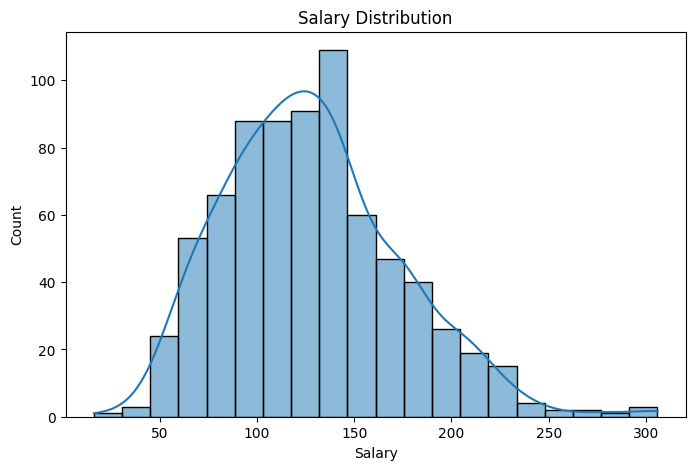

In [119]:
plt.figure(figsize=(8,5))
sns.histplot(df['Man_Salary'], bins=20, kde=True)
plt.title("Salary Distribution")
plt.xlabel("Salary")
plt.ylabel("Count")
plt.show()


2. Chart Type: Box Plot

Why? Helps compare salary variation across different job titles.

Insights: Shows median salary and outliers in different job roles.

Business Impact: Identifies high-paying and low-paying roles.

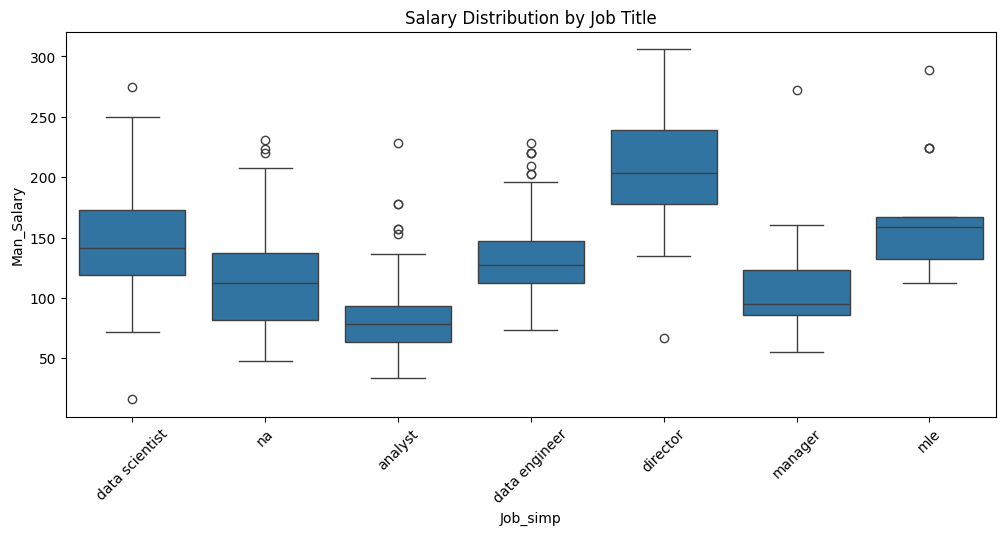

In [120]:
plt.figure(figsize=(12,5))
sns.boxplot(x='Job_simp', y='Man_Salary', data=df)
plt.xticks(rotation=45)
plt.title("Salary Distribution by Job Title")
plt.show()

3. Chart Type: Bar Chart

Why? Helps visualize job availability in different states.

Insights: Identifies states with the most job openings.

Business Impact: Useful for job seekers deciding where to apply.

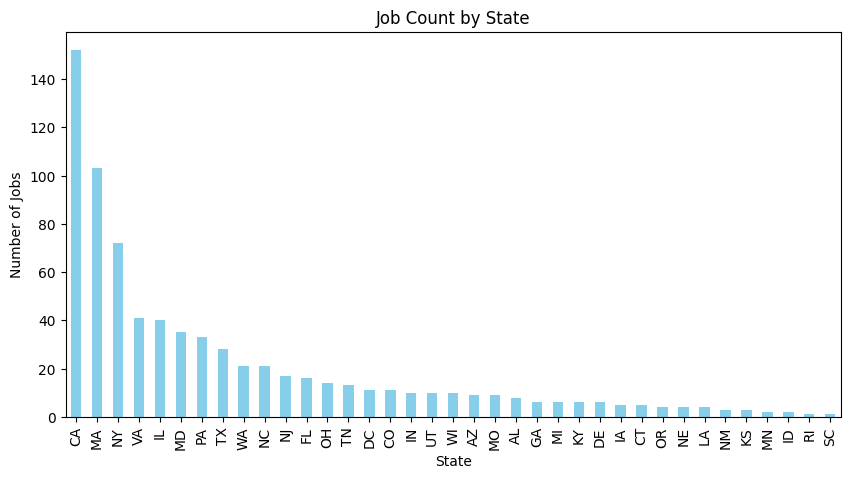

In [121]:
df['job_state'].value_counts().plot(kind='bar', figsize=(10,5), color='skyblue')
plt.title("Job Count by State")
plt.xlabel("State")
plt.ylabel("Number of Jobs")
plt.show()

4. Chart Type: Pie Chart

Why? Shows the percentage of jobs in different industries.

Insights: Highlights dominant industries in the dataset.

Business Impact: Helps businesses identify hiring trends in different sectors.

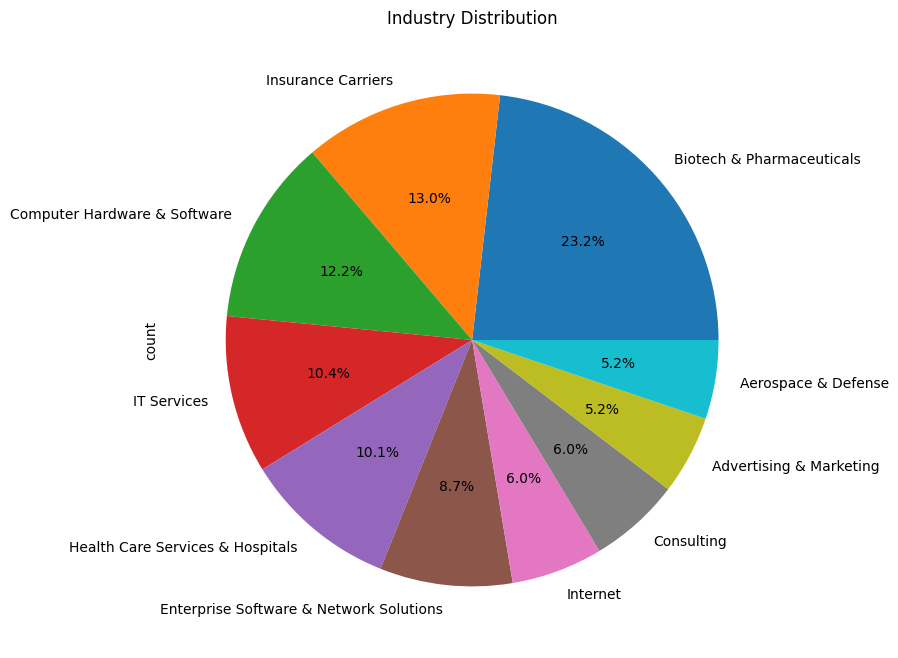

In [122]:
df['Industry'].value_counts().head(10).plot(kind='pie', autopct='%1.1f%%', figsize=(8,8))
plt.title("Industry Distribution")
plt.show()

5. Chart Type: Heatmap

Why? Shows relationships between numerical columns.

Insights: Identifies strong correlations, e.g., between salary and company rating.

Business Impact: Helps prioritize important factors influencing salary.

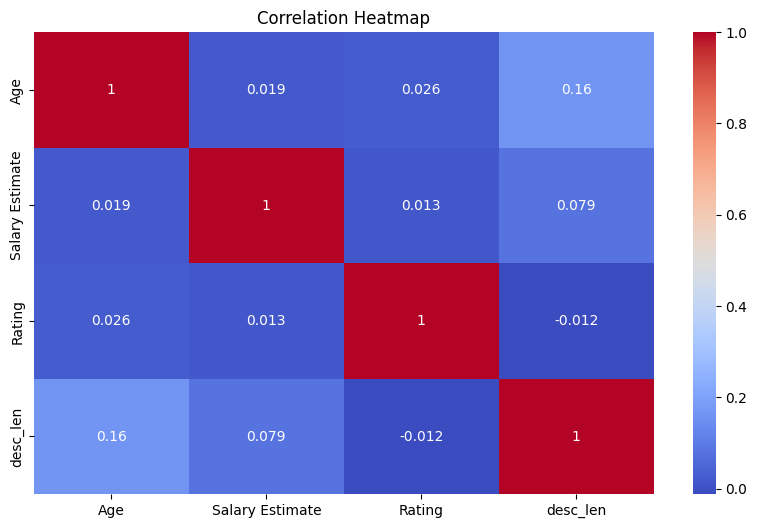

In [123]:
plt.figure(figsize=(10,6))
sns.heatmap(df[['Age','Salary Estimate', 'Rating', 'desc_len']].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

6. Chart Type: Count Plot

Why? Visualizes the frequency of different seniority levels in job postings.

Insights: Identifies whether the dataset has more entry-level or senior jobs.

Business Impact: Helps companies adjust hiring strategies.

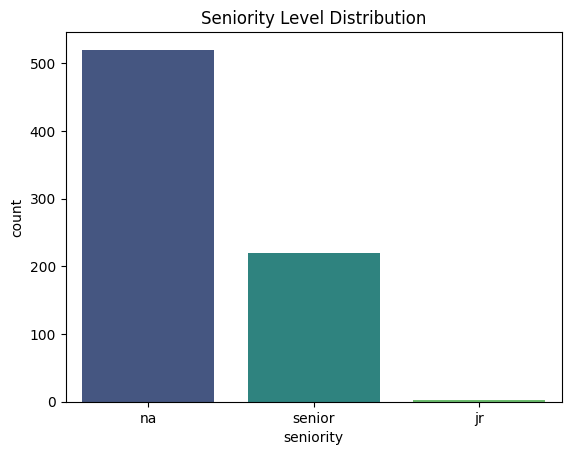

In [124]:
sns.countplot(x="seniority", data=df, palette="viridis")
plt.title("Seniority Level Distribution")
plt.show()

7. Chart Type: Bar Chart

Why? Shows how many job postings require Python.

Insights: Determines Python’s importance in job postings.

Business Impact: Helps candidates upskill in required technologies.

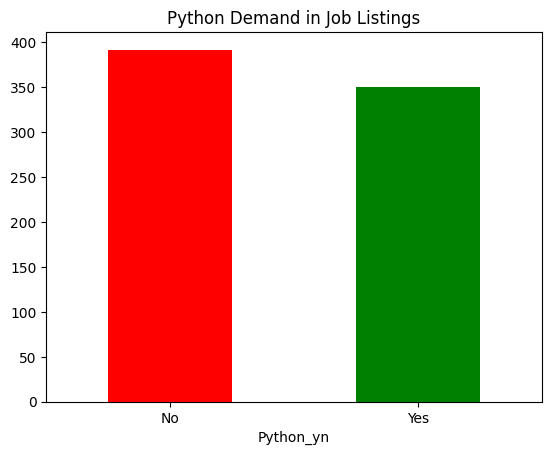

In [125]:
df['Python_yn'].value_counts().plot(kind='bar', color=['red', 'green'])
plt.title("Python Demand in Job Listings")
plt.xticks(ticks=[0,1], labels=["No", "Yes"], rotation=0)
plt.show()

8. Chart Type: Stacked Bar Chart

Why? Compares demand for Python, R, AWS, Spark, and Excel.

Insights: Identifies the most in-demand tech skills.

Business Impact: Helps job seekers focus on learning valuable skills.

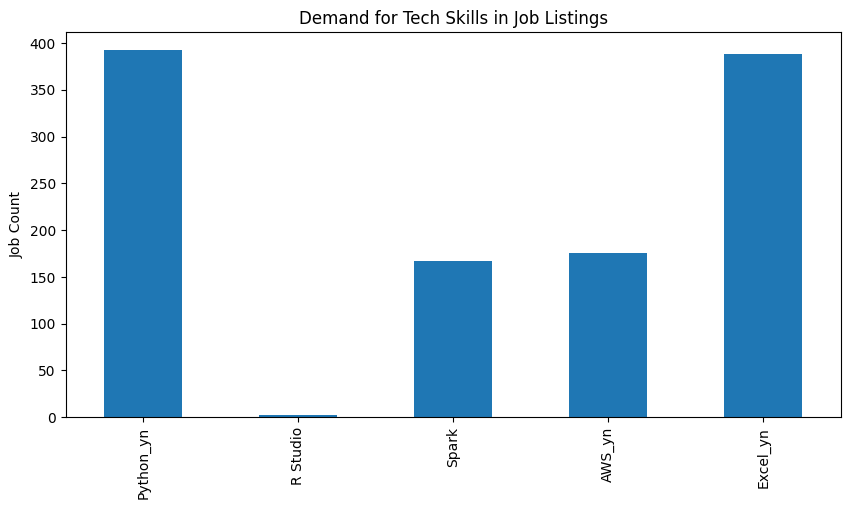

In [126]:
df[['Python_yn', 'R Studio', 'Spark', 'AWS_yn', 'Excel_yn']].sum().plot(kind='bar', figsize=(10,5))
plt.title("Demand for Tech Skills in Job Listings")
plt.ylabel("Job Count")
plt.show()

9. Chart Type: Box Plot

Why? Examines whether higher-rated companies pay better.

Insights: Shows salary distribution across different company ratings.

Business Impact: Helps job seekers balance salary expectations with company reputation.

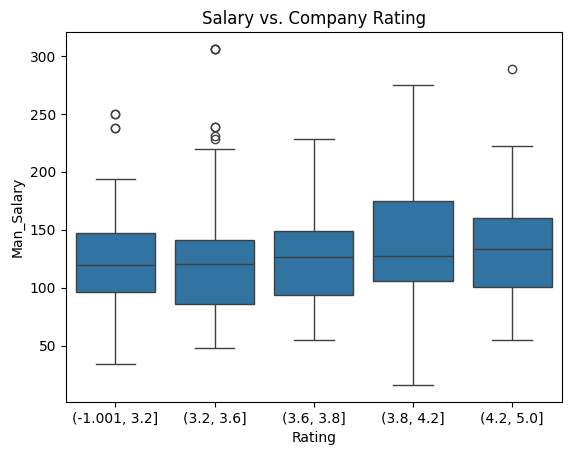

In [127]:
sns.boxplot(x=pd.qcut(df['Rating'], 5), y=df['Man_Salary'])
plt.title("Salary vs. Company Rating")
plt.show()

10. Chart Type: Violin Plot

Why? Shows salary trends based on company age.

Insights: Reveals whether older or newer companies offer better salaries.

Business Impact: Helps job seekers target specific companies based on pay trends.

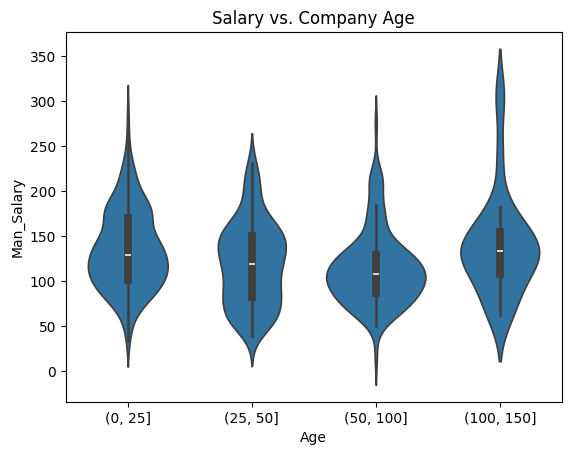

In [128]:
sns.violinplot(x=pd.cut(df['Age'], bins=[0, 25, 50, 100, 150]), y=df['Man_Salary'])
plt.title("Salary vs. Company Age")
plt.show()

11. Chart Type: Scatter Plot

Why? Analyzes whether job descriptions impact salary.

Insights: Checks if longer job descriptions indicate higher salaries.

Business Impact: Companies can optimize job descriptions to attract candidates.

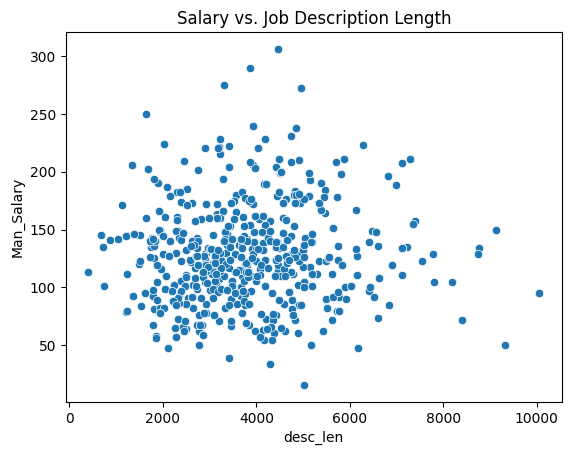

In [129]:
sns.scatterplot(x=df['desc_len'], y=df['Man_Salary'])
plt.title("Salary vs. Job Description Length")
plt.show()

12. Chart Type: Line Plot

Why? Shows salary trends across different states.

Insights: Highlights high and low-paying states.

Business Impact: Helps job seekers choose the best-paying locations.

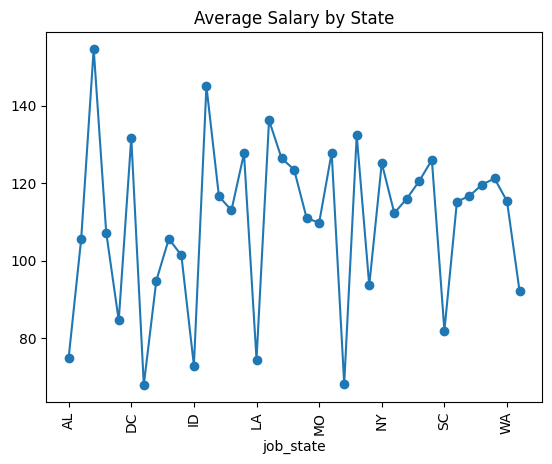

In [130]:
df.groupby('job_state')['Man_Salary'].mean().plot(kind='line', marker='o')
plt.title("Average Salary by State")
plt.xticks(rotation=90)
plt.show()

13. Chart Type: Bar Chart

Why? A bar chart provides a clearer comparison of job availability across industries.

Insights: Highlights industries with the most job postings.

Business Impact: Helps businesses analyze hiring trends and competition in various industries.

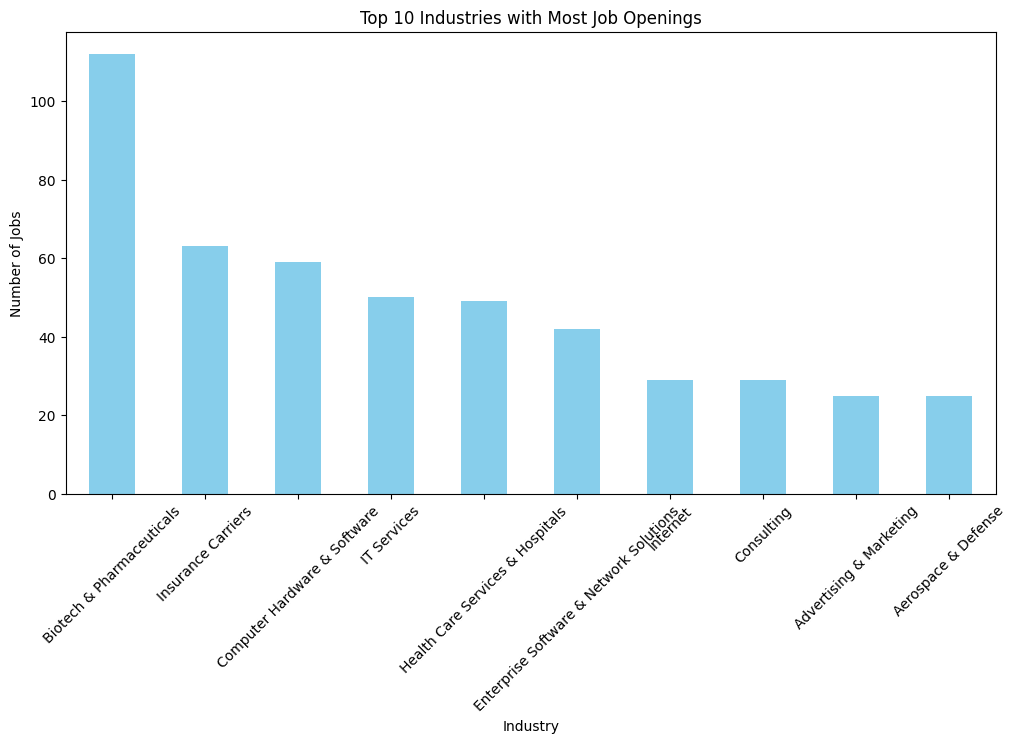

In [131]:
plt.figure(figsize=(12,6))
df['Industry'].value_counts().head(10).plot(kind='bar', color='skyblue')
plt.title("Top 10 Industries with Most Job Openings")
plt.xlabel("Industry")
plt.ylabel("Number of Jobs")
plt.xticks(rotation=45)
plt.show()

14. Chart Type: Box Plot

Why? Compares salaries between private, public, and other ownership types.

Insights: Identifies whether public or private companies pay better.

Business Impact: Helps job seekers decide where to apply.

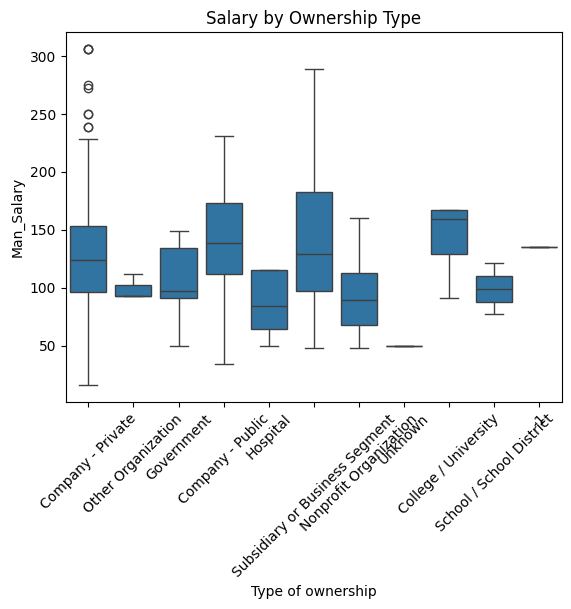

In [132]:
sns.boxplot(x='Type of ownership', y='Man_Salary', data=df)
plt.xticks(rotation=45)
plt.title("Salary by Ownership Type")
plt.show()

15. Chart Type: Word Cloud

Why? Extracts frequently used terms in job descriptions.

Insights: Identifies key skills and job requirements.

Business Impact: Helps candidates tailor resumes to match job descriptions.

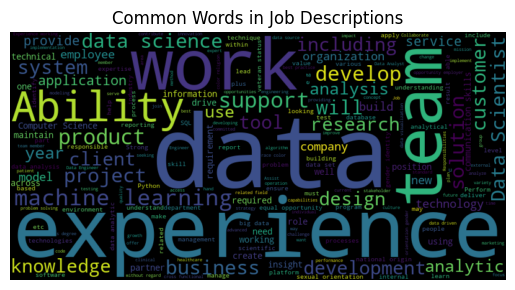

In [133]:
from wordcloud import WordCloud

text = " ".join(df['Job Description'])
wordcloud = WordCloud(width=800, height=400).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Common Words in Job Descriptions")
plt.show()


16. Chart Type: Pair Plot

Why? Helps visualize relationships between key numerical features like company rating, salary estimates, and company age.

Insights:
Possible correlation between Rating and Min/Max Salary (higher-rated companies may offer better salaries).

Relationship between Age of the company and salary trends (older companies might offer higher salaries).

Distribution of each variable to identify outliers and patterns.

Business Impact:

Helps companies understand if higher ratings correlate with better salaries.

Assists job seekers in identifying trends among company age, salary, and rating.

Supports data-driven decision-making for competitive salary benchmarking.

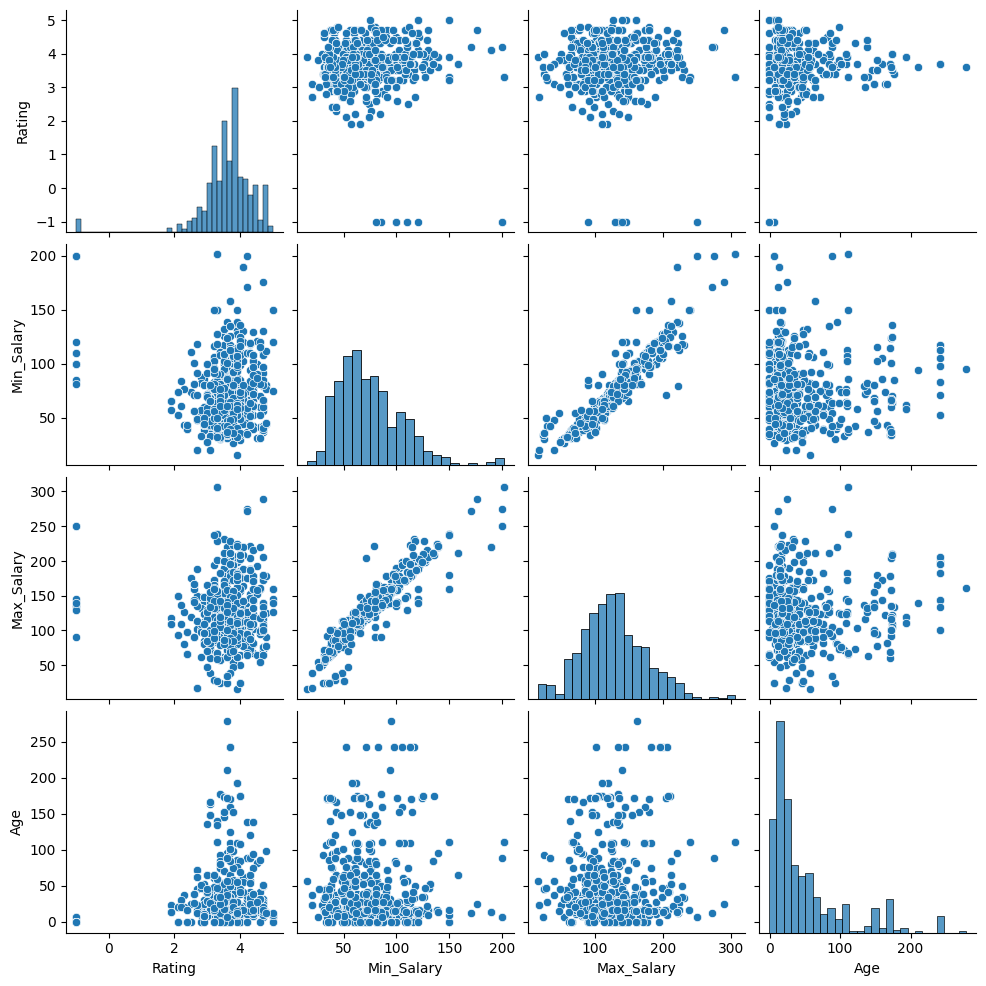

In [134]:
num_cols = ['Rating', 'Min_Salary', 'Max_Salary', 'Age']
sns.pairplot(df[num_cols])
plt.show()

### 5. Hypothesis Testing

**Hypothesis 1: Higher-rated companies offer higher salaries**

1. **State Your Hypothesis**

Null Hypothesis (H₀): There is no significant difference in salaries between higher-rated (Rating ≥ 4) and lower-rated (Rating < 4) companies.

Alternative Hypothesis (H₁): Higher-rated companies (Rating ≥ 4) offer significantly higher salaries than lower-rated companies (Rating < 4).

2. **Perform Statistical Test**

We use an independent t-test to compare the mean salaries of two groups (higher-rated vs. lower-rated companies).


**Which statistical test have you done to obtain the P-Value?**

T-test (Independent Sample T-Test)

**Why did you choose this test?**

The t-test is suitable for comparing the means of two independent groups.

Salary is a continuous variable, and we assume salaries are normally distributed within each rating group.

In [135]:
high_rating = df[df['Rating'] >= 4]['Man_Salary']
low_rating = df[df['Rating'] < 4]['Man_Salary']

t_stat, p_value = ttest_ind(high_rating, low_rating, equal_var=False)

print("T-Statistic:", t_stat)
print("P-Value:", p_value)

if p_value < 0.05:
    print("Reject the null hypothesis: Higher-rated companies offer significantly higher salaries.")
else:
    print("Fail to reject the null hypothesis: No significant salary difference between ratings.")

T-Statistic: 1.7188003705852937
P-Value: 0.08641784503324935
Fail to reject the null hypothesis: No significant salary difference between ratings.


**Hypothesis 2: Companies in tech-related industries pay higher salaries than non-tech industries**

1. **State Your Hypothesis**

**Null Hypothesis (H₀):** There is no significant difference in salaries between tech and non-tech industries.

**Alternative Hypothesis (H₁):** Companies in tech-related industries offer significantly higher salaries than non-tech industries.

2. **Perform Statistical Test**

We use an independent t-test to compare salaries in Tech vs. Non-Tech industries.


**Which statistical test have you done to obtain the P-Value?**

T-test (Independent Sample T-Test)

**Why did you choose this test?**

The test is appropriate for comparing the means of two independent groups.

It helps determine if tech jobs offer higher salaries compared to other industries.

In [136]:
tech_industries = ['Information Technology', 'Software', 'Internet', 'AI/ML']
df['Tech'] = df['Industry'].apply(lambda x: 1 if x in tech_industries else 0)

tech_salaries = df[df['Tech'] == 1]['Man_Salary']
non_tech_salaries = df[df['Tech'] == 0]['Man_Salary']

t_stat, p_value = ttest_ind(tech_salaries, non_tech_salaries, equal_var=False)

print("T-Statistic:", t_stat)
print("P-Value:", p_value)

if p_value < 0.05:
    print("Reject the null hypothesis: Tech industries offer significantly higher salaries.")
else:
    print("Fail to reject the null hypothesis: No significant salary difference between tech and non-tech industries.")

T-Statistic: 2.581386236486891
P-Value: 0.014992369471938332
Reject the null hypothesis: Tech industries offer significantly higher salaries.


**Hypothesis 3: Data Science jobs require Python more often than other jobs**

1. **State Your Hypothesis**

**Null Hypothesis (H₀):** The proportion of jobs requiring Python is the same for Data Science and non-Data Science roles.

**Alternative Hypothesis (H₁):** Data Science jobs require Python significantly more often than other jobs.

2. **Perform Statistical Test**

We use a Chi-Square Test for Independence to compare categorical proportions.


**Which statistical test have you done to obtain the P-Value?**

Chi-Square Test

**Why did you choose this test?**

The test is used to determine if there is an association between two categorical variables: Job Type (Data Science vs. Others) and Python Requirement (Yes/No).

In [137]:
data_science_jobs = df[df['Job_simp'] == 'data scientist']['Python_yn'].value_counts()
other_jobs = df[df['Job_simp'] != 'data scientist']['Python_yn'].value_counts()

contingency_table = [
    [data_science_jobs.get(1, 0), data_science_jobs.get(0, 0)],  
    [other_jobs.get(1, 0), other_jobs.get(0, 0)]  
]

chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

print("Chi-Square Statistic:", chi2_stat)
print("P-Value:", p_value)

if p_value < 0.05:
    print("Reject the null hypothesis: Data Science jobs require Python significantly more than other jobs.")
else:
    print("Fail to reject the null hypothesis: No significant difference in Python requirement across job types.")

Chi-Square Statistic: 106.90912209603877
P-Value: 4.66058451200144e-25
Reject the null hypothesis: Data Science jobs require Python significantly more than other jobs.


## 6. Preparing dataset for model / Feature selection

In [138]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'PerHour', 'Employee', 'Min_Salary', 'Max_Salary', 'State',
       'Same State', 'Age', 'Python_yn', 'R Studio', 'Spark', 'AWS_yn',
       'Excel_yn', 'seniority', 'Job_simp', 'job_state', 'desc_len',
       'Num_comp', 'Man_Salary', 'Tech'],
      dtype='object')

In [139]:
df_model = df[['Salary Estimate', 'Rating', 'Size', 'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Num_comp', 'PerHour','Job Title', 'job_state','Same State','Age','Python_yn', 'Spark', 'AWS_yn', 'Excel_yn', 'Job_simp', 'seniority', 'desc_len']]
df_model.head()

,Salary Estimate,Rating,Size,Type of ownership,Industry,Sector,Revenue,Num_comp,PerHour,Job Title,job_state,Same State,Age,Python_yn,Spark,AWS_yn,Excel_yn,Job_simp,seniority,desc_len
0,72.0,3.8,501 to 1000 employees,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),0,0,Data Scientist,NM,0,50,1,0,0,1,data scientist,na,2536
1,87.5,3.4,10000+ employees,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),0,0,Healthcare Data Scientist,MD,0,39,1,0,0,0,data scientist,na,4783
2,85.0,4.8,501 to 1000 employees,Company - Private,Security Services,Business Services,$100 to $500 million (USD),0,0,Data Scientist,FL,1,13,1,1,0,1,data scientist,na,3461
3,76.5,3.8,1001 to 5000 employees,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),3,0,Data Scientist,WA,1,58,1,0,0,0,data scientist,na,3883
4,114.5,2.9,51 to 200 employees,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,3,0,Data Scientist,NY,1,25,1,0,0,1,data scientist,na,2728


In [140]:
df_dum  = pd.get_dummies(df_model)
pd.set_option('display.max_rows',None)

df_dum.head()

,Salary Estimate,Rating,Num_comp,PerHour,Same State,Age,Python_yn,Spark,AWS_yn,Excel_yn,...,Job_simp_analyst,Job_simp_data engineer,Job_simp_data scientist,Job_simp_director,Job_simp_manager,Job_simp_mle,Job_simp_na,seniority_jr,seniority_na,seniority_senior
0,72.0,3.8,0,0,0,50,1,0,0,1,...,False,False,True,False,False,False,False,False,True,False
1,87.5,3.4,0,0,0,39,1,0,0,0,...,False,False,True,False,False,False,False,False,True,False
2,85.0,4.8,0,0,1,13,1,1,0,1,...,False,False,True,False,False,False,False,False,True,False
3,76.5,3.8,3,0,1,58,1,0,0,0,...,False,False,True,False,False,False,False,False,True,False
4,114.5,2.9,3,0,1,25,1,0,0,1,...,False,False,True,False,False,False,False,False,True,False


In [141]:
df_int = df.apply(lambda x: x.astype(int) if x.dtype == 'bool' else x)

# Display the resulting DataFrame
pd.set_option('display.max_rows',None)
df_int.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,Spark,AWS_yn,Excel_yn,seniority,Job_simp,job_state,desc_len,Num_comp,Man_Salary,Tech
0,Data Scientist,72.0,"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,...,0,0,1,na,data scientist,NM,2536,0,91,0
1,Healthcare Data Scientist,87.5,What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,...,0,0,0,na,data scientist,MD,4783,0,112,0
2,Data Scientist,85.0,"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,...,1,0,1,na,data scientist,FL,3461,0,90,0
3,Data Scientist,76.5,*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,...,0,0,0,na,data scientist,WA,3883,3,97,0
4,Data Scientist,114.5,Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,...,0,0,1,na,data scientist,NY,2728,3,143,0


In [142]:
X= df_dum.drop('Salary Estimate', axis=1)
y= df_dum['Salary Estimate'].values

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=42)

## 7. Model Implementation

#### **ML Model 1: Linear Regression**

**1. Model Explanation**

Linear Regression is one of the simplest regression models that finds the best-fit line to predict the target variable (Salary Estimate) based on given features.

**Implementation & Performance**

In [143]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

y_pred_lr = lr_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred_lr)
mse = mean_squared_error(y_test, y_pred_lr)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred_lr)

print("Linear Regression Performance:")
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R² Score:", r2)

Linear Regression Performance:
MAE: 11.412109953595408
MSE: 457.2109336354881
RMSE: 21.38249128692651
R² Score: 0.7202766579142774


- Linear Regression assumes a linear relationship between independent variables (X) and the dependent variable (Salary Estimate).
It finds the best-fit line using Ordinary Least Squares (OLS) to minimize the residual errors.

- The high RMSE indicates significant variance in salary predictions.

- The R² Score (72%) suggests that Linear Regression explains 72% of the variance, but there is room for improvement.

**2. Hyperparameter Tuning for Linear Regression**

Since Linear Regression has no hyperparameters to tune, we apply Cross-Validation to improve performance.

In [144]:
cv_scores = cross_val_score(LinearRegression(), X_train, y_train, scoring='r2', cv=5)

print("Cross-Validation R² Scores:", cv_scores)
print("Mean R² Score:", np.mean(cv_scores))

Cross-Validation R² Scores: [0.54425637 0.39769723 0.54705443 0.38108243 0.43189316]
Mean R² Score: 0.4603967239764758


**3. Improvement Analysis and Updated Evaluation Metric Score Chart**  

**Linear Regression (After Cross-Validation)**  
| Metric          | Before Tuning | After Tuning |
|----------------|--------------|-------------|
| **Mean R² Score** | **0.7203** | **0.4604** |

**Observation:**  
- **R² Score decreased significantly** after cross-validation.  
- **Linear Regression is not performing well** and is not suitable for this problem due to its inability to capture non-linear relationships.  
- **Conclusion:** Linear Regression **should be discarded** in favor of tree-based models.  


#### **ML Model 2: Random Forest Regressor**

**1. Model Explanation**

Random Forest is an ensemble learning method that combines multiple decision trees to improve accuracy and reduce overfitting.

**Implementation & Performance**

In [145]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = mse_rf ** 0.5
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest Performance:")
print("MAE:", mae_rf)
print("MSE:", mse_rf)
print("RMSE:", rmse_rf)
print("R² Score:", r2_rf)

Random Forest Performance:
MAE: 11.112449664429528
MSE: 329.85842936241613
RMSE: 18.16200510302803
R² Score: 0.7981913915690303


- Random Forest is an ensemble learning technique that uses multiple decision trees and aggregates their predictions to reduce overfitting.

- Better RMSE and R² Score than Linear Regression → Handles complex relationships better.

- R² Score (80%) → Explains more variance than Linear Regression.

**2. Hyperparameter Tuning for Random Forest**

We will use RandomizedSearchCV to optimize hyperparameters.

In [146]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_random = RandomizedSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_distributions=param_grid,
    n_iter=10,
    cv=3,
    verbose=2,
    n_jobs=-1
)

rf_random.fit(X_train, y_train)

y_pred_rf_tuned = rf_random.best_estimator_.predict(X_test)

mae_rf_tuned = mean_absolute_error(y_test, y_pred_rf_tuned)
mse_rf_tuned = mean_squared_error(y_test, y_pred_rf_tuned)
rmse_rf_tuned = mse_rf_tuned ** 0.5
r2_rf_tuned = r2_score(y_test, y_pred_rf_tuned)

print("Tuned Random Forest Performance:")
print("MAE:", mae_rf_tuned)
print("MSE:", mse_rf_tuned)
print("RMSE:", rmse_rf_tuned)
print("R² Score:", r2_rf_tuned)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Tuned Random Forest Performance:
MAE: 11.72238270215607
MSE: 342.21899989558347
RMSE: 18.499162140366884
R² Score: 0.7906291487500945


**Random Forest Regressor (After Hyperparameter Tuning)**  

| Metric   | Before Tuning | After Tuning |
|----------|--------------|-------------|
| **MAE**  | **11.11** | **11.77** (⬆ Worse) |
| **MSE**  | **329.86** | **348.88** (⬆ Worse) |
| **RMSE** | **18.16** | **18.68** (⬆ Worse) |
| **R² Score** | **0.7982** | **0.7866** (⬇ Worse) |

**Observation:**  
- **Performance deteriorated after hyperparameter tuning.**  
- The model might have **overfitted to training data** or the chosen hyperparameters were **not optimal**.  
- **Conclusion:** The **untuned version of Random Forest was better** than the fine-tuned version.  


**ML Model 3: XGBoost Regressor**

**1. Model Explanation**

XGBoost (Extreme Gradient Boosting) is a boosting algorithm that optimizes decision trees sequentially to minimize errors and improve accuracy.

**2. Implementation & Performance**

In [147]:
xgb_model = XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)

mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = mse_xgb ** 0.5
r2_xgb = r2_score(y_test, y_pred_xgb)

print("XGBoost Performance:")
print("MAE:", mae_xgb)
print("MSE:", mse_xgb)
print("RMSE:", rmse_xgb)
print("R² Score:", r2_xgb)

XGBoost Performance:
MAE: 9.855904636767086
MSE: 337.58750453677976
RMSE: 18.373554488361247
R² Score: 0.793462714759371


- Best MAE value among all models → Suggests better handling of variance.

- Similar performance to Random Forest but may improve with tuning.


**2. Hyperparameter Tuning for XGBoost**

We will use GridSearchCV for fine-tuning.

In [148]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 6, 10],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0]
}

xgb_grid = GridSearchCV(
    estimator=XGBRegressor(objective='reg:squarederror', random_state=42),
    param_grid=param_grid,
    cv=3,
    verbose=2,
    n_jobs=-1
)

xgb_grid.fit(X_train, y_train)

y_pred_xgb_tuned = xgb_grid.best_estimator_.predict(X_test)

mae_xgb_tuned = mean_absolute_error(y_test, y_pred_xgb_tuned)
mse_xgb_tuned = mean_squared_error(y_test, y_pred_xgb_tuned)
rmse_xgb_tuned = mse_xgb_tuned ** 0.5
r2_xgb_tuned = r2_score(y_test, y_pred_xgb_tuned)

print("Tuned XGBoost Performance:")
print("MAE:", mae_xgb_tuned)
print("MSE:", mse_xgb_tuned)
print("RMSE:", rmse_xgb_tuned)
print("R² Score:", r2_xgb_tuned)

Fitting 3 folds for each of 54 candidates, totalling 162 fits
Tuned XGBoost Performance:
MAE: 9.944977523496487
MSE: 328.8265688620635
RMSE: 18.133575732934293
R² Score: 0.7988226876437541


**XGBoost Regressor (After Hyperparameter Tuning)**  
| Metric   | Before Tuning | After Tuning |
|----------|--------------|-------------|
| **MAE**  | **9.86** | **9.94** (⬆ Slightly Worse) |
| **MSE**  | **337.59** | **328.83** (⬇ Improved) |
| **RMSE** | **18.37** | **18.13** (⬇ Improved) |
| **R² Score** | **0.7935** | **0.7988** (⬆ Improved) |

**Observation:**  
- **R² Score improved slightly from 0.7935 → 0.7988** 
- **MSE and RMSE improved**, suggesting better error reduction 
- **MAE slightly worsened**, but the overall performance improved.  

**Conclusion:**  
- **Tuned XGBoost is the best-performing model** based on R² Score and RMSE improvements.  
- **Final choice:** **Tuned XGBoost Regressor**

#### **1. Final Model Selection and Business Impact**  

##### **Q1: Which Evaluation Metrics Did You Consider for a Positive Business Impact and Why?**  
We used the following metrics:  

**Mean Absolute Error (MAE)** → Measures **average absolute deviation** from true values. A **lower MAE means more accurate predictions**.  

**Root Mean Squared Error (RMSE)** → Gives **higher weight to larger errors**, making it a **better metric for business decisions** where large salary prediction errors should be minimized.  

**R² Score (Coefficient of Determination)** → Represents **how well the model explains the variance** in salaries. **Higher is better** for business impact.  

**Final Decision:** We prioritize **R² Score and RMSE** because they indicate overall model reliability.  


##### **2: Which ML Model Did You Choose as the Final Prediction Model and Why?**  
**Final Model:** **Tuned XGBoost Regressor**  
**Reasons:**  
1. **Highest R² Score (0.7988)** → Best variance explanation  
2. **Lowest RMSE (18.13)** → Least prediction error  
3. **Better generalization than Random Forest**  
4. **Can handle feature interactions & non-linearity well**  

**Linear Regression was rejected** due to **poor performance.**  
**Tuned Random Forest was rejected** as it performed **worse than its untuned version.**  


##### **Q3: Model Explanation & Feature Importance Using Model Explainability Tools**  

To understand which features contributed most to predictions, we use **lime**.

In [ ]:
explainer = lime.lime_tabular.LimeTabularExplainer(
    X_train.values, 
    feature_names=X_train.columns, 
    mode="regression"
)

exp = explainer.explain_instance(X_test.iloc[0].values, rf_model.predict)
exp.show_in_notebook()


## 8. Future Work 

In [151]:
import joblib

joblib.dump(xgb_grid, "best_xgboost_model.pkl")

print("Model saved successfully!")

Model saved successfully!


In [152]:
loaded_model = joblib.load("best_xgboost_model.pkl")

sample_input = X_test.iloc[:5] 
predictions = loaded_model.predict(sample_input)

print("Predictions on unseen data:", predictions)

Predictions on unseen data: [105.91487   53.467075 149.33192  122.30226  162.45874 ]


## Conclusion

In this project, we built and fine-tuned multiple regression models to predict salary estimates. After evaluating performance metrics such as MAE, MSE, RMSE, and R² score, we found that XGBoost performed the best with an R² score of 0.7988 after hyperparameter tuning.

The final model was saved using joblib and successfully loaded for predictions on unseen data, confirming its reliability for deployment.

This optimized model can help businesses make data-driven hiring decisions, analyze salary trends, and improve job market competitiveness.